# kNN Predictors

*   Coded by DrQ 
*   adapted two modes from L2 notebook



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Boston Housing Dataset: 


*  https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html
*  fea1: CRIM - per capita crime rate by town
*  fea14: MEDV - Median value of owner-occupied homes in $1000's 
*  fea5: NOX - nitric oxides concentration (parts per 10 million)
*  fea6: RM - average number of rooms per dwelling








(506, 13)
(506,)
(506, 1)
(506,)


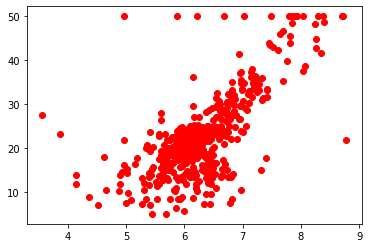

In [ ]:
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)

# Let's have a look at the last feature:
X = boston.data[:, 5]
print(X.shape)
X = X.reshape(-1, 1)
print(X.shape)

#the boston housing data set, the targets to be predicted corresponds to the weighted distances to the five Boston employment centers.
y = boston.target
print(y.shape)

plt.scatter(X, y,  color='red')


In [ ]:
# import regressor
from sklearn.neighbors import KNeighborsRegressor
# instantiate with K=5
knn = KNeighborsRegressor(n_neighbors=5)
# fit with data
knn.fit(X, y)


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

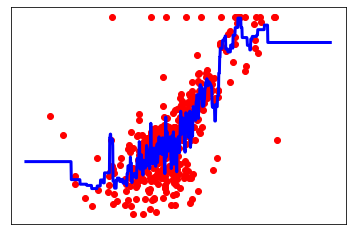

In [ ]:
### 
Xfit = np.linspace(3, 10, 1000).reshape(-1, 1)
yfit =knn.predict(Xfit)

# Plot outputs
plt.scatter(X, y,  color='red')
plt.plot(Xfit, yfit, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

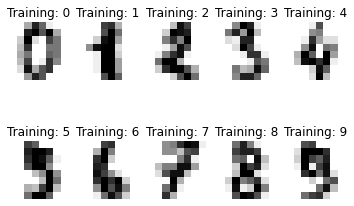

In [ ]:
# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

# The digits dataset
digits = datasets.load_digits()

_, axes = plt.subplots(2, 5)
images_and_labels = list(zip(digits.images, digits.target))
for ax, (image, label) in zip(axes[0, :], images_and_labels[:5]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)
for ax, (image, label) in zip(axes[1, :], images_and_labels[5:10]):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)


# To apply a classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

# Split data into train and test subsets
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)


Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform'):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        88
           1       0.98      0.99      0.98        91
           2       0.98      0.94      0.96        86
           3       0.91      0.92      0.92        91
           4       0.99      0.93      0.96        92
           5       0.97      0.97      0.97        91
           6       0.99      1.00      0.99        91
           7       0.98      1.00      0.99        89
           8       0.95      0.95      0.95        88
           9       0.91      0.93      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899


Confusion matri

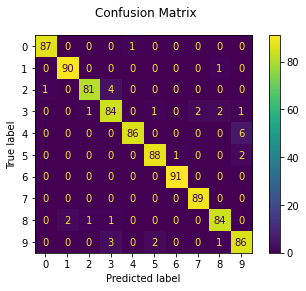

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a classifier: kNN classifier
classifier = KNeighborsClassifier(n_neighbors=3)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()


Classification report for classifier SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted a

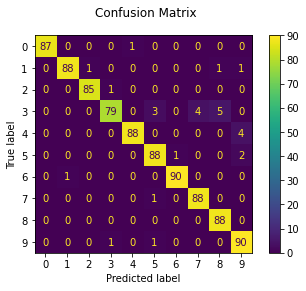

In [ ]:

# Create a classifier: a support vector classifier
classifier = svm.SVC(gamma=0.001)

# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

# Now predict the value of the digit on the second half:
predicted = classifier.predict(X_test)

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))
disp = metrics.plot_confusion_matrix(classifier, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print("Confusion matrix:\n%s" % disp.confusion_matrix)

plt.show()
